In [33]:
#data manipulation
import pandas as pd

# mathematical functions
import numpy as np
from scipy.stats import randint, uniform
import random

# data splitting
from sklearn.model_selection import train_test_split

# data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
import category_encoders as ce
from category_encoders import BinaryEncoder
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans

# algorithms
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# model training requirements
import warnings
from sklearn.model_selection import RandomizedSearchCV, KFold

# model evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# save model
import joblib

In [34]:
# gathering dataset for building prediction model
df1 = pd.read_csv("application_record.csv")

# remove spaces in columns name
df1.columns = df1.columns.str.replace(' ','_')

# print shape of df
print("The shape of df1:", df1.shape)

df1.head()

The shape of df1: (438557, 18)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [35]:
# gathering dataset for building prediction model
df2 = pd.read_csv("credit_record.csv")

# remove spaces in columns name
df2.columns = df2.columns.str.replace(' ','_')

# print shape of df
print("The shape of df2:", df2.shape)

df2.head()

The shape of df2: (1048575, 3)


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [36]:
# perform inner join on ID column
df = pd.merge(df1, df2, on='ID', how='outer')

# print shape of df
print("The shape of df:", df.shape)

df.head()

The shape of df: (1450675, 20)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0.0,C
1,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-1.0,C
2,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-2.0,C
3,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-3.0,C
4,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-4.0,C


In [37]:
# Define a function to map the status values to the 3 categories
def map_status(STATUS):
    if STATUS in ['0', '1', '2', '3', '4', '5']:
        return 0 # Deny
    elif STATUS in ['C', 'X']:
        return 1 # Approve
    else:
        return np.nan

# Replace the status column with the mapped values
df["STATUS"] = df["STATUS"].apply(map_status)

df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0.0,1.0
1,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-1.0,1.0
2,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-2.0,1.0
3,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-3.0,1.0
4,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-4.0,1.0


In [83]:
# -----TARGET SELECTION-----
# Output Feature
target_feature = "STATUS"
print("Target Feature: \n", target_feature)
print()
# -----INPUT FEATURE RECOGNITION-----
# -----all features-----
all_features = df.columns.to_list()
print('All Features: \n', all_features)
print()
# -----numeric features-----
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object' and df[feature].dtype !='datetime64[ns]']
print('Numeric Features: \n', numeric_features)
print()
# -----categorical features-----
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print('Categorical Features: \n', categorical_features)
print()
# -----contionus numieric features-----
continuous_numeric_features = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
print('Continuous Numeric Features: \n', continuous_numeric_features)
print()
# -----binary features-----
binary_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 
                   'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']
df[binary_features] = df[binary_features].astype('object')
print('Binary Features: \n', binary_features)
print()
# -----ordinal features-----
ordinal_features = []
print('Ordinal Features: \n', ordinal_features)
print()
# -----nominal features-----
nominal_features = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']
print('Nominal Features: ', nominal_features)
print()
# -----high cardinality features-----

# Set the threshold for high cardinality
threshold = 7

# Calculate the number of unique values in each column
cardinality = df[categorical_features].nunique()

# Select the columns where the number of unique values is greater than the threshold
high_cardinality_features = cardinality[cardinality > threshold].index.tolist()
print('High cardinality features: ', high_cardinality_features)
print()

Target Feature: 
 STATUS

All Features: 
 ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS']

Numeric Features: 
 ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS']

Categorical Features: 
 ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']

Continuous Numeric Features: 
 ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED']

Binary Features: 
 ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']

Ordinal Features: 
 []

Nominal Features:  ['NAME_INCOME_TYPE', 'NAME_

In [39]:
# print the shape of the df
print("The shape of the df :", df.shape)
print()
# find missing values by column
print("The missing values in the df :")
print(df.isnull().sum())

The shape of the df : (1450675, 20)

The missing values in the df :
ID                          0
CODE_GENDER            270860
FLAG_OWN_CAR           270860
FLAG_OWN_REALTY        270860
CNT_CHILDREN           270860
AMT_INCOME_TOTAL       270860
NAME_INCOME_TYPE       270860
NAME_EDUCATION_TYPE    270860
NAME_FAMILY_STATUS     270860
NAME_HOUSING_TYPE      270860
DAYS_BIRTH             270860
DAYS_EMPLOYED          270860
FLAG_MOBIL             270860
FLAG_WORK_PHONE        270860
FLAG_PHONE             270860
FLAG_EMAIL             270860
OCCUPATION_TYPE        633788
CNT_FAM_MEMBERS        270860
MONTHS_BALANCE         402100
STATUS                 402100
dtype: int64


In [40]:
# remove rows with missing values for the specified columns
df = df.dropna(subset= ['STATUS', 'CODE_GENDER'])

# remove Occupation Type column because it has many missing values
df = df.drop(columns = ['OCCUPATION_TYPE'])

# remove ID as it is not useful for credit card approval prediction for new customers
df = df.drop(columns = ['ID'])

# print the shape of the df
print("The shape of the cleaned df :", df.shape)
print()

The shape of the cleaned df : (777715, 18)



In [41]:
print(df.isnull().sum())

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64


In [42]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0
1,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0,-1.0,1.0
2,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0,-2.0,1.0
3,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0,-3.0,1.0
4,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0,-4.0,1.0


# EDA

In [43]:
import seaborn as sns

<Axes: xlabel='FLAG_EMAIL', ylabel='Count'>

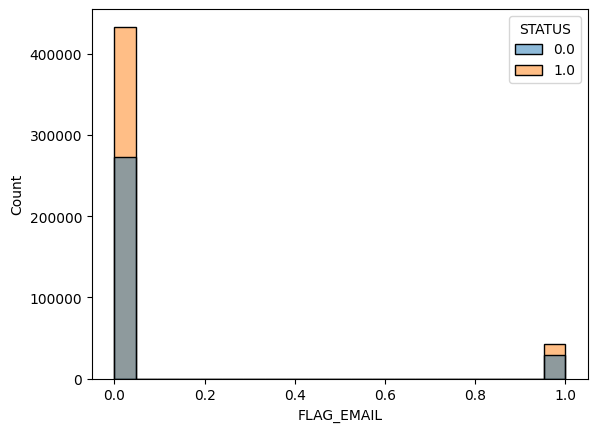

In [44]:
sns.histplot(data=df,x='FLAG_EMAIL',hue='STATUS')

<Axes: xlabel='CODE_GENDER', ylabel='Count'>

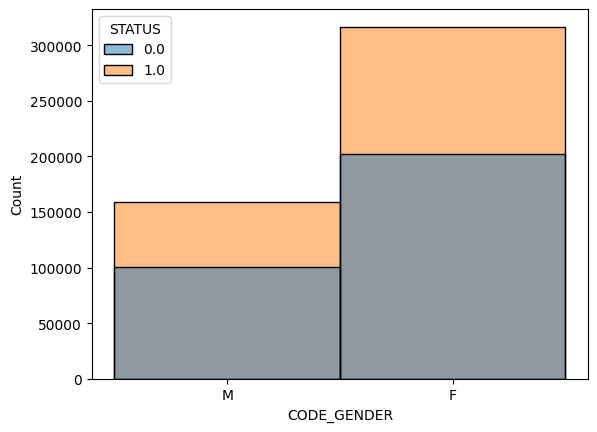

In [45]:
sns.histplot(data=df,x='CODE_GENDER',hue='STATUS')

<Axes: xlabel='FLAG_OWN_CAR', ylabel='Count'>

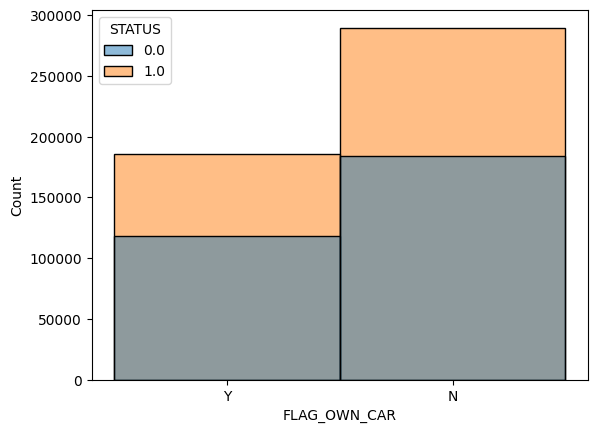

In [46]:
sns.histplot(data=df,x='FLAG_OWN_CAR',hue='STATUS')

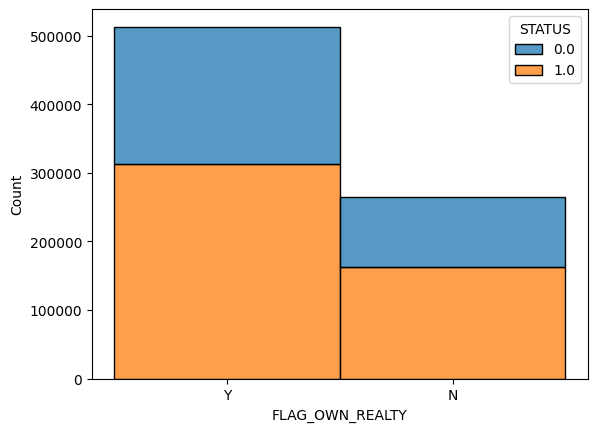

In [47]:
import matplotlib.pyplot as plt
sns.histplot(data=df, x='FLAG_OWN_REALTY', hue=target_feature, multiple="stack")
plt.show()

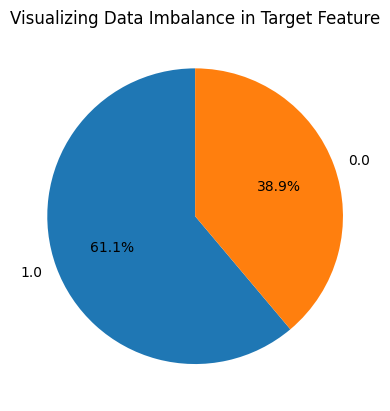

In [48]:
df['STATUS'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Visualizing Data Imbalance in Target Feature')
plt.ylabel('')
plt.show()

## data splitting

In [49]:
# Assign input features (also for feature selection)
X = df[['CODE_GENDER', 'FLAG_EMAIL', 'FLAG_MOBIL', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
        'FLAG_PHONE', 'FLAG_WORK_PHONE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
        'NAME_INCOME_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']]

# Assign Target Feature
y = df[target_feature]


# Perform stratified train_val-test split for input features
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.10,  random_state=0)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.11,  random_state=0)


# Print shapes of the datasets
print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_val: ', X_val.shape)
print('Shape of y_val: ', y_val.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)
print()

# Dataset Splitting Summary
total_samples = X_train.shape[0] + X_val.shape[0] + X_test.shape[0]

train_percent =  X_train.shape[0] / total_samples * 100
val_percent = X_val.shape[0] / total_samples * 100
test_percent = X_test.shape[0] / total_samples * 100

print(f"Training set percentage: {train_percent:.0f}%")
print(f"Validation set percentage: {val_percent:.0f}%")
print(f"Test set percentage: {test_percent:.0f}%")

Shape of X_train:  (622949, 15)
Shape of y_train:  (622949,)
Shape of X_val:  (76994, 15)
Shape of y_val:  (76994,)
Shape of X_test:  (77772, 15)
Shape of y_test:  (77772,)

Training set percentage: 80%
Validation set percentage: 10%
Test set percentage: 10%


In [84]:
# Create an instance of CountEncoder 
c_encoder = ce.CountEncoder()

# get updated high cardinality feature names
high_cardinality_features = np.intersect1d(high_cardinality_features, X_train.columns)

# check if high_cardinality_features are available then apply count encoder to X_train, X_val, and X_test
if high_cardinality_features.size == 0:
    print('Note: High cardinality features Unavailable!')
    X_train_c_encoded, X_val_c_encoded, X_test_c_encoded = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
else:
    # fit_transform object on train set and transform on test set
    X_train_c_encoded, X_val_c_encoded, X_test_c_encoded = c_encoder.fit_transform(X_train[high_cardinality_features]), c_encoder.transform(X_val[high_cardinality_features]), c_encoder.transform(X_test[high_cardinality_features])

Note: High cardinality features Unavailable!


In [85]:
# Create an instance of BinaryEncoder
b_encoder = BinaryEncoder()

# get updated binary feature names
binary_features = np.intersect1d(binary_features, X_train.columns)

# check if binary_features are available then apply binary encoder to X_train, X_val, and X_test
if binary_features.size == 0:
    print('Note: Binary features Unavailable!')
    X_train_b_encoded, X_val_b_encoded, X_test_b_encoded = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
else:
    # fit_transform object on train set and transform on test set
    X_train_b_encoded, X_val_b_encoded, X_test_b_encoded = b_encoder.fit_transform(X_train[binary_features]), b_encoder.transform(X_val[binary_features]), b_encoder.transform(X_test[binary_features])

In [90]:
binary_features

array(['CODE_GENDER', 'FLAG_EMAIL', 'FLAG_MOBIL', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'FLAG_PHONE', 'FLAG_WORK_PHONE'], dtype=object)

In [87]:
# Create an instance of OneHotEncoder
encoder = OneHotEncoder(handle_unknown = 'ignore')

# get updated nominal feature names
nominal_features = np.intersect1d(nominal_features, X_train.columns)

# check if nominal_features are available then apply one hot encoder to X_train, X_val, and X_test
if nominal_features.size == 0:
    print('Note: Nominal features Unavailable!')
    X_train_o_encoded, X_val_o_encoded, X_test_o_encoded = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
else:
    # fit_transform object on train set and transform on test set
    X_train_o_encoded, X_val_o_encoded, X_test_o_encoded = encoder.fit_transform(X_train[nominal_features]), encoder.transform(X_val[nominal_features]), encoder.transform(X_test[nominal_features])

    # Get the names of the nominal columns
    column_names = encoder.get_feature_names_out(nominal_features)

    # convert X_train_encoded, X_val_encoded, X_test_encoded to dense numpy array
    X_train_o_encoded, X_val_o_encoded, X_test_o_encoded = X_train_o_encoded.toarray(), X_val_o_encoded.toarray(), X_test_o_encoded.toarray()

    # convert X_train_encoded, X_val_encoded, X_test_encoded dense numpy array to DataFrame
    X_train_o_encoded, X_val_o_encoded, X_test_o_encoded = pd.DataFrame(X_train_o_encoded, columns=column_names), pd.DataFrame(X_val_o_encoded, columns=column_names), pd.DataFrame(X_test_o_encoded, columns=column_names)

In [91]:
nominal_features

array(['NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'NAME_INCOME_TYPE'], dtype=object)

In [76]:
# Combine the encoded DataFrames

# Reset the index of each DataFrame
X_train_c_encoded, X_train_b_encoded, X_train_o_encoded = X_train_c_encoded.reset_index(drop=True), X_train_b_encoded.reset_index(drop=True), X_train_o_encoded.reset_index(drop=True)
X_val_c_encoded, X_val_b_encoded, X_val_o_encoded = X_val_c_encoded.reset_index(drop=True), X_val_b_encoded.reset_index(drop=True), X_val_o_encoded.reset_index(drop=True)
X_test_c_encoded, X_test_b_encoded, X_test_o_encoded = X_test_c_encoded.reset_index(drop=True), X_test_b_encoded.reset_index(drop=True), X_test_o_encoded.reset_index(drop=True)

# Combine the encoded DataFrames using pd.concat
X_train_encoded = pd.concat([X_train_c_encoded, X_train_b_encoded, X_train_o_encoded], axis=1)
X_val_encoded = pd.concat([X_val_c_encoded, X_val_b_encoded, X_val_o_encoded], axis=1)
X_test_encoded = pd.concat([X_test_c_encoded, X_test_b_encoded, X_test_o_encoded], axis=1)

## feature scaling

In [92]:
# Create an instance of StandardScaler
scaler = StandardScaler(with_mean=False)

# Convert column names to set
all_features = set(X_train.columns)

# Create sets of high cardinality, binary, and nominal features
hc_features = set(high_cardinality_features)
binary_features = set(binary_features)
nominal_features = set(nominal_features)

# Find the set of features that are not in any of the three sets
numeric_features = all_features - hc_features - binary_features - nominal_features

# convert numeric_features to list
numeric_features = np.array(list(numeric_features))

# check if nominal_features are available then apply scaler to X_train, X_val, and X_test
if numeric_features.size == 0:
    print('Numeric features Unavailable!')
    X_train_scaled, X_val_scaled, X_test_scaled = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
else:
    # fit_transform object on train set and transform on test set
    X_train_scaled, X_val_scaled, X_test_scaled = scaler.fit_transform(X_train[numeric_features]), scaler.transform(X_val[numeric_features]), scaler.transform(X_test[numeric_features])

    # convert X_train_scaled, X_val_scaled, X_test_scaled numpy array to DataFrame
    X_train_scaled, X_val_scaled, X_test_scaled = pd.DataFrame(X_train_scaled, columns=numeric_features), pd.DataFrame(X_val_scaled, columns=numeric_features), pd.DataFrame(X_test_scaled, columns=numeric_features)

In [93]:
numeric_features

array(['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'DAYS_EMPLOYED'],
      dtype='<U15')

In [78]:
# update the scaled dataframe by concatenating with encoded dfs
X_train_scaled = pd.concat([X_train_encoded, X_train_scaled], axis=1)
X_val_scaled = pd.concat([X_val_encoded, X_val_scaled], axis=1)
X_test_scaled = pd.concat([X_test_encoded, X_test_scaled], axis=1)

# Model Training

In [56]:
# define the models and hyperparameter search spaces
models = {
    'lr': {
        'model': LogisticRegression(random_state=0),
        'param_distributions': {
            # Regularization strength
            'C': np.logspace(-10, 10, 21),
            # Solver for optimization
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
            # Maximum number of iterations
            'max_iter': randint(100, 1000),
        }
    },
    
    'rf': {
        'model': RandomForestClassifier(random_state=0),
        'param_distributions': {
                # number of estimators
                'n_estimators': [25, 50],
                # Regularization parameter
                'max_features': ['sqrt', 'log2'],
                # Regularization parameter    
                'max_depth': [15, 25, 35, 50],
                # Regularization parameter    
                'min_samples_split': [2, 4, 8],
                # Regularization parameter    
                'min_samples_leaf': [2, 6, 8],
                # bootstrap strategy
                'bootstrap': [True, False]
        }
    }
}


# Define cross-validation method
cv = KFold(n_splits=3)

# Perform hyperparameter tuning on all models
best_models = {}
for name in models:
    print(f'{name}:')
    
    # ignore all warnings
    warnings.filterwarnings('ignore')
    
    # define the random search object
    random_search = RandomizedSearchCV(
        models[name]['model'],
        param_distributions=models[name]['param_distributions'],
        n_iter=3, 
        cv=cv,
        scoring='f1_macro',
        random_state=0)
    
    # perform hyperparameter tuning with random search
    random_search.fit(X_train_scaled, y_train)
    
    # get the best model and its hyperparameters
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_
    
    # store the best model in the dictionary
    best_models[name] = {'model': best_model, 'params': best_params}

    # print best hyperparameters and best score
    print(f'Best hyperparameters: {random_search.best_params_}')
    print(f'Best f1 score: {random_search.best_score_:.3f}')
    print()

lr:
Best hyperparameters: {'C': 100.0, 'max_iter': 659, 'solver': 'lbfgs'}
Best f1 score: 0.380

rf:
Best hyperparameters: {'n_estimators': 25, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 35, 'bootstrap': True}
Best f1 score: 0.677



In [57]:
# get best model name and score
best_model = best_models['rf']['model']

print('Best Model:', best_model)

Best Model: RandomForestClassifier(max_depth=35, max_features='log2', min_samples_leaf=2,
                       min_samples_split=4, n_estimators=25, random_state=0)


In [58]:
# fit model on entire train set
best_model.fit(X_train_scaled, y_train)

# predict model on train set
y_pred_train = best_model.predict(X_train_scaled)

# Generate the classification report
report = classification_report(y_train, y_pred_train)

# Print the report
print(report)

              precision    recall  f1-score   support

         0.0       0.70      0.50      0.58    241981
         1.0       0.73      0.87      0.79    380968

    accuracy                           0.72    622949
   macro avg       0.72      0.68      0.69    622949
weighted avg       0.72      0.72      0.71    622949



In [59]:
# predict model on train set
y_pred_val = best_model.predict(X_val_scaled)

# Generate the classification report
report = classification_report(y_val, y_pred_val)

# Print the report
print(report)

              precision    recall  f1-score   support

         0.0       0.69      0.49      0.57     29979
         1.0       0.72      0.86      0.79     47015

    accuracy                           0.71     76994
   macro avg       0.71      0.67      0.68     76994
weighted avg       0.71      0.71      0.70     76994



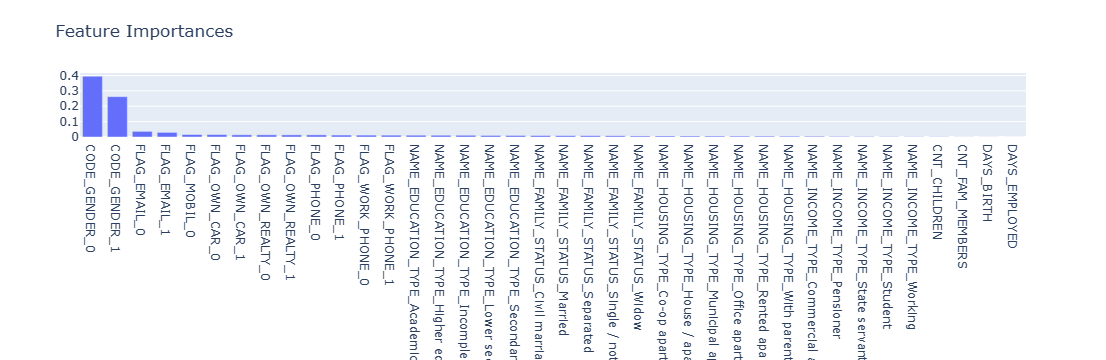

In [60]:
import plotly.graph_objs as go
# feature names
feature_names = X_val_scaled.columns

# Get the feature importances
importances = best_model.feature_importances_

# Get the indices that would sort the importances in ascending order
sorted_indices = np.argsort(importances)

# Reverse the order of the sorted indices to get descending order
descending_indices = sorted_indices[::-1]

# Sort the importances and feature names in descending order
importances_descending = importances[descending_indices]
feature_names_descending = feature_names[descending_indices]

# Create a bar chart of the feature importances
fig = go.Figure(
    data=[go.Bar(x=feature_names, y=importances_descending)],
    layout=go.Layout(title="Feature Importances")
)

# Show the chart
fig.show()

In [61]:
#predict model on test set
y_pred_test = best_model.predict(X_test_scaled)

# Generate the classification report
report = classification_report(y_test, y_pred_test)

# Print the report
print(report)

              precision    recall  f1-score   support

         0.0       0.69      0.49      0.57     30269
         1.0       0.72      0.86      0.79     47503

    accuracy                           0.71     77772
   macro avg       0.71      0.67      0.68     77772
weighted avg       0.71      0.71      0.70     77772



In [62]:
joblib.dump(best_model,'bm.joblib')

['bm.joblib']

In [63]:
bm=joblib.load('bm.joblib')

In [64]:
#predict model on test set
y_pred_test = bm.predict(X_test_scaled)

# Generate the classification report
report = classification_report(y_test, y_pred_test)

# Print the report
print(report)

              precision    recall  f1-score   support

         0.0       0.69      0.49      0.57     30269
         1.0       0.72      0.86      0.79     47503

    accuracy                           0.71     77772
   macro avg       0.71      0.67      0.68     77772
weighted avg       0.71      0.71      0.70     77772



In [89]:
joblib.dump({
    'binary_encoder': b_encoder,
    'one_hot_encoder': encoder,
    'scaler': scaler,
}, 'preprocessing_steps.joblib')

['preprocessing_steps.joblib']